(https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Cassandra1.jpeg/800px-Cassandra1.jpeg)
## Notebook to run serial methods

With this notebook you can run live/backtest Kaissandra, plot live results and much more

In [1]:
import sys
import os

this_path = os.getcwd()
path = '\\'.join(this_path.split('\\')[:-1])+'\\'
if path not in sys.path:
    sys.path.insert(0, path)
    print(path+" added to python path")
else:
    print(path+" already in python path")
    
import pandas as pd
import datetime as dt
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2


C:\Users\mgutierrez\root\Projects\SDC\py\kaissandra\ added to python path


## Init Util Functions and Constants 

In [28]:
def get_positions_filename(asset, open_dt, close_dt):
    """  """
    
    dt_open = dt.datetime.strftime(dt.datetime.strptime(
            open_dt,'%Y.%m.%d %H:%M:%S'),'%y%m%d%H%M%S')
    dt_close = dt.datetime.strftime(dt.datetime.strptime(
            close_dt,'%Y.%m.%d %H:%M:%S'),'%y%m%d%H%M%S')
    filename = 'O'+dt_open+'C'+dt_close+asset
    return filename

In [195]:
live = False
config_name = 'T0007'#'T0003'
if live:
    ext = '_LI_'
    directory = 'kaissandra_live/live'
    start_time = '19_01_27_23_18_41'
else:
    ext = '_BT_'
    directory = 'back_test'
    start_time = '19_02_19_14_23_40'#'19_02_15_17_30_37'
results_dir = '../../RNN/resultsLive/'+directory+'/trader/'
pos_dirname = results_dir
pos_filename = start_time+ext+"positions_soll.log"
positions_dir = '../../RNN/resultsLive/'+directory+'/positions/'+start_time+'/'
filename = results_dir+start_time+ext+config_name+"positions_soll.log"
positions = pd.read_csv(filename).sort_values(by=['Entry Time']).reset_index().drop(labels='index',axis=1)
#print(positions)

T01010-1k1k2
Total GROI = 8.90% Total ROI = 0.96% total profit = 95.88e mean spread = 2.45 pips expected mean spread = 2.47 pips 
Number entries 324 GSP = 57.10%  NSP = 52.78%  av win = 0.185%  av lose = -0.184% 
Percent below 2p 47.53%
-1.3147511602712292


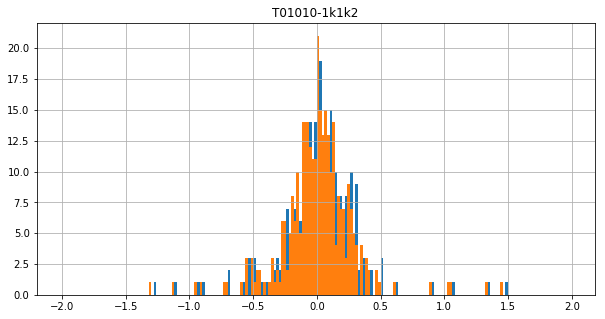

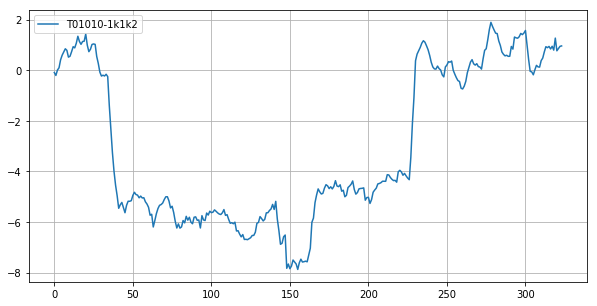

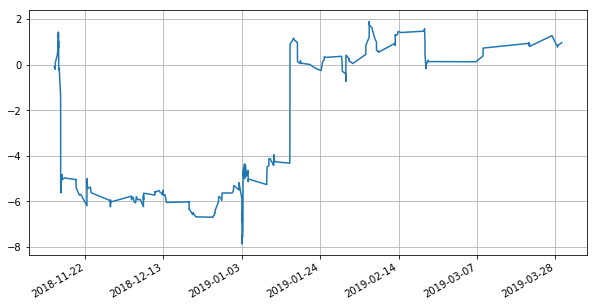

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

import pandas as pd

plt.rcParams['figure.figsize'] = [10, 5]
live = False

#config_names = ['T0004','T0005','T0006','T0007','T0008','']
#legends = ['T0004','T0005','T0006','T0007','T0008','T0003']
#start_times = ['19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_15_17_30_37']#

#config_names = ['T0009','T0010','T0011']#['T0004','T0005','T0006','T0007','T0008','']
#legends = ['T0009','T0010','T0011']#['T0004','T0005','T0006','T0007','T0008','T0003']
#start_times = ['19_02_21_20_34_40','19_02_21_20_34_40','19_02_21_20_34_40']#['19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_15_17_30_37']#

config_names = ['T01010-1k1k2']
start_times = ['19_04_09_12_01_10']
legends = config_names

if live:
    ext = '_LI_'
    directory = 'kaissandra_live/live'
    start_time = '19_01_27_23_18_41'
else:
    ext = '_BT_'
    directory = 'back_test'
    #start_time = '19_02_15_17_30_37'#'19_02_19_14_23_40'
results_dir = '../../RNN/resultsLive/'+directory+'/trader/'
pos_dirname = results_dir
#pos_filename = start_time+ext+"positions_soll.log"
filenames = [results_dir+start_times[i]+ext+config_names[i]+"positions_soll.log" for i in range(len(config_names))]
positions_list =  [pd.read_csv(filename).sort_values(by=['Entry Time']).reset_index().drop(labels='index',axis=1) for filename in filenames]
#print(positions)

for i in range(len(config_names)):
    #print(positions.GROI.sum())
    #print(positions.ROI.sum())
    #print(positions.Profit.sum())
    #print(positions.Profit)
    config_name = config_names[i]
    print(config_name)
    positions = positions_list[i]
    
    tgroi = positions['GROI'].sum()
    troi = positions['ROI'].sum()
    tprofit = positions['Profit'].sum()
    mspread = positions['Spread'].mean()
    emspread = positions['E_spread'].mean()
    SIs = positions.agg({'GROI': lambda x: 100*np.sum(x>0)/len(x),
                          'ROI': lambda x: 100*np.sum(x>0)/len(x)})
    av_win = sum(positions[positions['GROI']>0]['GROI'])/len(positions[positions['GROI']>0]['GROI'])
    av_lose = sum(positions[positions['GROI']<0]['GROI'])/len(positions[positions['GROI']<0]['GROI'])
    per_under_2p = 100*positions[positions['Spread']<0.02].shape[0]/positions.shape[0]

    print("Total GROI = {0:.2f}% ".format(tgroi)+"Total ROI = {0:.2f}% ".format(troi)+\
          "total profit = {0:.2f}e ".format(tprofit)+"mean spread = {0:.2f} pips ".format(100*mspread)+
          "expected mean spread = {0:.2f} pips ".format(100*emspread))
    print("Number entries "+str(positions.shape[0])+" GSP = {0:.2f}% ".format(SIs['GROI'])\
          +" NSP = {0:.2f}% ".format(SIs['ROI'])+" av win = {0:.3f}% ".format(av_win)+" av lose = {0:.3f}% ".format(av_lose))
    print("Percent below 2p {0:.2f}%".format(per_under_2p))
    #print(pd.DataFrame(prob_rois))
    grouped = positions.groupby(['Asset'])
    #print(grouped.get_group(('GBPJPY',1)).to_string())
    #grouped.aggregate(np.sum)
    #grouped['groi'].describe()
    #grouped.get_group('GBPJPY')
    SI = grouped.agg({'GROI': lambda x: np.sum(x>0)/len(x),
                 'ROI': lambda x: np.sum(x>0)/len(x)})#.rename(['GSI','NSI'])
    grouped.agg({'E_spread': lambda x: 100*np.sum(x<0.02)/len(x)})
    #print(SI)
    #print(grouped.describe())
    #for name, group in grouped:
        #print(name)
    #    print(group.to_string())
    
    plt.figure(i)
    gran = 100
    min_h = int(gran*np.floor(positions['GROI'].min()))
    max_h = int(gran*np.ceil(positions['GROI'].max()))
    print(positions['ROI'].min())
    #print(positions['GROI'].max())
    bins = [i/gran for i in range(min_h,max_h,2)]
    histG = plt.hist(positions['GROI'], bins=bins)
    histR = plt.hist(positions['ROI'], bins=bins)
    plt.grid()
    plt.title(config_name)

    #pos_under_thr.index = range(pos_under_thr.shape[0])
    plt.figure(100)
    #plt.plot(range(positions.shape[0]),positions['GROI'].cumsum())
    plt.plot(range(positions.shape[0]),positions['ROI'].cumsum(),label=legends[i])
    plt.grid()
    plt.legend()

    list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['Entry Time']]
    dates = matplotlib.dates.date2num(list_dates)
    plt.figure(101)
    #plt.plot_date(list_dates, positions['GROI'].cumsum(),fmt='-')
    plt.plot_date(list_dates, positions['ROI'].cumsum(),fmt='-',label=legends[i])
    plt.gcf().autofmt_xdate()
    plt.grid()
    list_dates_live = list_dates
    positions_live = positions
    #plt.legend()

In [285]:
from kaissandra.config import *

configT4=retrieve_config('T0004')
print(configT4['netNames'])
print(configT4['list_spread_ranges'])
print(positions_list[0]['strategy'].unique())
configT5=retrieve_config('T0005')
print(configT5['list_name'])
print(positions_list[1]['strategy'].unique())
print(configT5['list_feats_from'])
configT6=retrieve_config('T0006')
print(configT6['list_name'])
print(positions_list[2]['strategy'].unique())
#print(configT6)
configT7=retrieve_config('T0007')
print(configT7['list_name'])
print(positions_list[3]['strategy'].unique())
print(configT7['list_spread_ranges'])
configT8=retrieve_config('T0008')
print(configT8['list_name'])
print(positions_list[4]['strategy'].unique())
print(configT8['list_feats_from'])
configT3=retrieve_config('T0003')
print(configT3['list_name'])
print(configT3['netNames'])
print(configT3['list_spread_ranges'])

Config file ../../config/T0004.config loaded from disk
['350E13T3S', '350E6T2L', '327T21E0S', '500E29T3L']
[{'sp': [2.5], 'th': [(0.55, 0.6)], 'dir': 'S'}, {'sp': [2.5], 'th': [(0.65, 0.65)], 'dir': 'L'}, {'sp': [2.5], 'th': [(0.75, 0.7)], 'dir': 'S'}, {'sp': [2.5], 'th': [(0.7, 0.6)], 'dir': 'L'}]
['100350L_6_1_.65_.55' '100500L_29_3_.7_.6' '100350S_13_3_.65_.6']
Config file ../../config/T0005.config loaded from disk
['100350S_13_3_.65_.6', '100350L_6_1_.65_.55']
['100350L_6_1_.65_.55' '100350S_13_3_.65_.6']
['B', 'B']
Config file ../../config/T0006.config loaded from disk
['100327S_21_0_.75_.7', '100500L_29_3_.7_.6']
['100500L_29_3_.7_.6']
Config file ../../config/T0007.config loaded from disk
['100350S_13_3_.65_.6', '100350L_6_1_.65_.55', '100327S_21_0_.75_.7', '100500L_29_3_.7_.6']
['100350L_6_1_.65_.55' '100500L_29_3_.7_.6' '100350S_13_3_.65_.6']
[{'sp': [2.5], 'th': [(0.55, 0.6)], 'dir': 'S'}, {'sp': [2.5], 'th': [(0.65, 0.65)], 'dir': 'L'}, {'sp': [2.5], 'th': [(0.75, 0.7)], 'di

In [ ]:
positions_list[2].sort_values(by=['ROI'],ascending=True).reset_index()

## Build Stats File and Plot Positions

In [ ]:
columns = ['asset','Di','Ti','Do','To','direction','groi','roi','profit','e_spread','spread','max','min','argmax','argmin','samples','extensions','stoploss','file']

plt_index = 0
idx_config = 2
positions = positions_list[idx_config]
config_name = config_names[idx_config]
start_time = start_times[idx_config]
pos_format = pd.DataFrame(data=0,columns=columns,index=range(positions.shape[0]))
positions_dir = '../../RNN/resultsLive/'+directory+'/positions/'+start_time+config_name+'/'
for p in range(positions.shape[0]):
    print(str(p)+" out of "+str(positions.shape[0]))
    pos_format['asset'].iloc[p] = positions['Asset'].iloc[p]
    pos_format['Di'].iloc[p] = positions['Entry Time'].iloc[p][:10]
    pos_format['Ti'].iloc[p] = positions['Entry Time'].iloc[p][11:]
    pos_format['Do'].iloc[p] = positions['Exit Time'].iloc[p][:10]
    pos_format['To'].iloc[p] = positions['Exit Time'].iloc[p][11:]
    pos_format['groi'].iloc[p] = positions['GROI'].iloc[p]
    pos_format['roi'].iloc[p] = positions['ROI'].iloc[p]
    pos_format['e_spread'].iloc[p] = positions['E_spread'].iloc[p]
    pos_format['spread'].iloc[p] = positions['Spread'].iloc[p]
    pos_format['profit'].iloc[p] = positions['Profit'].iloc[p]
    pos_format['stoploss'].iloc[p] = positions['stoploss'].iloc[p]
    direction = positions['Position'].iloc[p]
    pos_format['direction'].iloc[p] = direction
    filename_pos = get_positions_filename(positions['Asset'].iloc[p], positions['Entry Time'].iloc[p], positions['Exit Time'].iloc[p])
    pos_format['file'].iloc[p] = filename_pos
    pos_ev = pd.read_csv(positions_dir+filename_pos+'.txt', sep=',')
    pos_track = pickle.load( open( positions_dir+filename_pos+".p", "rb" ))
    pos_format['extensions'].iloc[p] = pos_track['n_ext']
    pos_format['samples'].iloc[p] = pos_ev.shape[0]
    #print(pos_ev.columns)
    maxBid = pos_ev['SymbolBid'].max()
    minBid = pos_ev['SymbolBid'].min()
    maxAsk = pos_ev['SymbolAsk'].max()
    minAsk = pos_ev['SymbolAsk'].min()
    Bi = positions['Bi'].iloc[p]
    Ai = positions['Ai'].iloc[p]
    #if direction>0:
    #        GROI_live = roi_ratio*(Ao-Ai)/Ai
    #        spread = (Ao-Bo)/Ai
    #        
    #    else:
    #        GROI_live = roi_ratio*(Bi-Bo)/Ao
    if direction>0:
        pos_format['max'].iloc[p] = 100*(maxAsk-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        pos_format['min'].iloc[p] = 100*(minAsk-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        pos_format['argmax'].iloc[p] = pos_ev['SymbolAsk'].idxmax()
        pos_format['argmin'].iloc[p] = pos_ev['SymbolAsk'].idxmin()
        groi_ev = 100*(pos_ev['SymbolAsk'].iloc[:]-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        label = 'long'
    else:
        pos_format['max'].iloc[p] = 100*(positions['Bi'].iloc[p]-minBid)/maxAsk
        pos_format['min'].iloc[p] = 100*(positions['Bi'].iloc[p]-maxBid)/maxAsk
        pos_format['argmax'].iloc[p] = pos_ev['SymbolBid'].idxmax()
        pos_format['argmin'].iloc[p] = pos_ev['SymbolBid'].idxmin()
        groi_ev = 100*(positions['Bi'].iloc[p]-pos_ev['SymbolBid'].iloc[:])/pos_ev['SymbolAsk'].iloc[:]
        label = 'short'
    if positions['GROI'].iloc[p]>0:
        color = 'green'
    else:
        color = 'red'
    #plt.figure(plt_index)
    #plt.plot(groi_ev, color=color, label=label)
    #for e in range(pos_track['n_ext']):
    #    plt.plot([pos_track['@tick#'][e+1] for i in range(2)],[pos_format['min'].iloc[p], pos_format['max'].iloc[p]])
    #plt.legend()
    #plt.title(filename_pos)
    plt_index += 1
print(pos_format.to_string())
pos_format.to_csv(positions_dir+config_name+'stats.csv', index=False, sep='\t', float_format='%.5f')
print("Positions summary saved")

In [283]:
positions_dir+'stats.csv'

'../../RNN/resultsLive/back_test/positions/19_02_19_14_23_40T0008/stats.csv'

## Get Summary from Position Stats

In [ ]:
tgroi = pos_format['groi'].sum()
troi = pos_format['roi'].sum()
tprofit = pos_format['profit'].sum()
mspread = pos_format['spread'].mean()
emspread = pos_format['e_spread'].mean()
SIs = pos_format.agg({'groi': lambda x: 100*np.sum(x>0)/len(x),
                      'roi': lambda x: 100*np.sum(x>0)/len(x)})
av_win = sum(pos_format[pos_format['groi']>0]['groi'])/len(pos_format[pos_format['groi']>0]['groi'])
av_lose = sum(pos_format[pos_format['groi']<0]['groi'])/len(pos_format[pos_format['groi']<0]['groi'])
per_under_2p = 100*pos_format[pos_format['e_spread']<0.02].shape[0]/pos_format.shape[0]

print("Total GROI = {0:.2f}% ".format(tgroi)+"Total ROI = {0:.2f}% ".format(troi)+"total profit = {0:.2f}e ".format(tprofit)+"mean spread = {0:.2f} pips ".format(100*mspread)+
      "expected mean spread = {0:.2f} pips ".format(100*emspread))
print("Number entries "+str(pos_format.shape[0])+" GSP = {0:.2f}% ".format(SIs['groi'])+" NSP = {0:.2f}% ".format(SIs['roi'])+" av win = {0:.3f}% ".format(av_win)+" av lose = {0:.3f}% ".format(av_lose))
print("Percent below 2p {0:.2f}%".format(per_under_2p))
#print(pd.DataFrame(prob_rois))
grouped = pos_format.groupby(['asset'])
#print(grouped.get_group(('GBPJPY',1)).to_string())
#grouped.aggregate(np.sum)
#grouped['groi'].describe()
#grouped.get_group('GBPJPY')
SI = grouped.agg({'groi': lambda x: np.sum(x>0)/len(x),
             'roi': lambda x: np.sum(x>0)/len(x)})#.rename(['GSI','NSI'])
grouped.agg({'e_spread': lambda x: 100*np.sum(x<0.02)/len(x)})
#print(SI)
#print(grouped.describe())
#for name, group in grouped:
    #print(name)
#    print(group.to_string())

## Run Kaissandra Online

In [32]:
from kaissandra.serial import launch
launch()

Config file ../../config/T01010-1k1k2.config loaded from disk
../../RNN/IOlive2/AUDCAD/ Directiory renewed
C:/Users/mgutierrez/AppData/Roaming/MetaQuotes/Terminal/D0E8209F77C8CF37AD8BF550E51FF075/MQL5/Files/IOlive/AUDCAD/ Directiory created
../../RNN/IOlive2/AUDCAD/ Directiory created
../../RNN/IOlive2/EURAUD/ Directiory renewed
C:/Users/mgutierrez/AppData/Roaming/MetaQuotes/Terminal/D0E8209F77C8CF37AD8BF550E51FF075/MQL5/Files/IOlive/EURAUD/ Directiory created
../../RNN/IOlive2/EURAUD/ Directiory created
../../RNN/IOlive2/EURCAD/ Directiory renewed
C:/Users/mgutierrez/AppData/Roaming/MetaQuotes/Terminal/D0E8209F77C8CF37AD8BF550E51FF075/MQL5/Files/IOlive/EURCAD/ Directiory created
../../RNN/IOlive2/EURCAD/ Directiory created
../../RNN/IOlive2/EURCHF/ Directiory renewed
C:/Users/mgutierrez/AppData/Roaming/MetaQuotes/Terminal/D0E8209F77C8CF37AD8BF550E51FF075/MQL5/Files/IOlive/EURCHF/ Directiory created
../../RNN/IOlive2/EURCHF/ Directiory created
../../RNN/IOlive2/EURGBP/ Directiory renew

In [103]:
import kaissandra.control as ct
ct.pause()

USDHKD
Asset not running
EURJPY
EURCHF
EURAUD
EURCZK
Asset not running
USDSGD
Asset not running
USDPLN
Asset not running
GBPCAD
GOLD
EURGBP
EURUSD
EURDKK
Asset not running
USDCAD
USDNOK
Asset not running
GBPAUD
NZDUSD
[USDX]
Asset not running
EURPLN
Asset not running
USDMXN
Asset not running
XAGUSD
Asset not running
EURCAD
AUDJPY
CADJPY
GBPUSD
USDCHF
USDRUB
Asset not running
CHFJPY
GBPCHF
XAUUSD
Asset not running
GBPJPY
EURNZD
AUDCAD
USDJPY


In [102]:
import kaissandra.control as ct
ct.resume()

USDHKD
FileNotFoundError
EURJPY
EURCHF
EURAUD
EURCZK
FileNotFoundError
USDSGD
FileNotFoundError
USDPLN
FileNotFoundError
GBPCAD
GOLD
EURGBP
EURUSD
EURDKK
FileNotFoundError
USDCAD
USDNOK
FileNotFoundError
GBPAUD
NZDUSD
[USDX]
FileNotFoundError
EURPLN
FileNotFoundError
USDMXN
FileNotFoundError
XAGUSD
FileNotFoundError
EURCAD
AUDJPY
CADJPY
GBPUSD
USDCHF
USDRUB
FileNotFoundError
CHFJPY
GBPCHF
XAUUSD
FileNotFoundError
GBPJPY
EURNZD
AUDCAD
USDJPY


In [ ]:
import kaissandra.control as ct
ct.shutdown()

In [ ]:
# runLive in multiple processes
from multiprocessing import Process
import datetime as dt
import time
%load_ext autoreload
%autoreload 2

from kaissandra.runLive import run

assets = [1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 16, 17, 19, 27, 28, 29, 30, 31, 32]#
running_assets = assets#[7, 14]
start_time = dt.datetime.strftime(dt.datetime.now(),'%y_%m_%d_%H_%M_%S')
#disp = Process(target=run, args=[running_assets,start_time])
#disp.start()
for ass_idx in range(len(running_assets)):
    disp = Process(target=run, args=[running_assets[ass_idx:ass_idx+1],start_time])
    disp.start()
    time.sleep(2)

## Get total returns

In [ ]:
import pandas as pd
start_time = '19_02_15_17_30_37'
results_dir = '../../RNN/resultsLive/back_test/trader/'
filename = results_dir+start_time+'_BT_'+"positions_soll.log"
positions = pd.read_csv(filename)
print(positions.GROI.sum())
print(positions.ROI.sum())
print(positions.Profit.sum())
print(positions.Profit)

In [ ]:
import pandas as pd
start_time = '19_04_09_12_01_10'
results_dir = '../../RNN/resultsLive/back_test/trader/'
filename = results_dir+start_time+'_BT_'+"T01010-1k1k2positions_soll.log"
positions = pd.read_csv(filename)
print(positions.GROI.sum())
print(positions.ROI.sum())
print(positions.Profit.sum())
print(positions.Profit)


## Retrieve Positions from Trader Simulation

In [177]:
# Positions file from trader simulation
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 3
start_time = '190212144049'
list_IDresults = ['100350NJLS','100327S','100500L']#
list_IDgre = [None for i in range(numberNetwors)]
list_name = ['100350NJLS_13_3_.65_.6','100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [13,21,29]
list_t_index = [3,0,2]
list_spread_ranges = [{'sp':[2.5],'th':[(.65,.6)]},{'sp':[2.5],'th':[(.75,.7)]},{'sp':[2.5],'th':[(.7,.6)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)


190212144049_100350NJLSE13TI3MC0.65MD0.6_100327SE21TI0MC0.75MD0.7_100500LE29TI2MC0.7MD0.6


In [ ]:
# Positions file from trader simulation
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 2
start_time = '190213090034'
list_IDresults = ['100327S','100500L']#
list_IDgre = [None for i in range(numberNetwors)]
list_name = ['100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [21,29]
list_t_index = [0,2]
list_spread_ranges = [{'sp':[2.5],'th':[(.75,.7)]},{'sp':[2.5],'th':[(.7,.6)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)


In [ ]:
# Positions file from trader simulation
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 1
start_time = '190213095021'
#E13TI3MC0.65MD0.6
list_IDresults = ['100350NJLS']#
list_IDgre = [None for i in range(numberNetwors)]
#list_name = ['100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [13]
list_t_index = [3]
list_spread_ranges = [{'sp':[2.5],'th':[(.65,.6)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)


In [9]:

pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 2
start_time = '190213103037'
#E13TI3MC0.65MD0.6
list_IDresults = ['100350S','100350L']#
list_IDgre = [None for i in range(numberNetwors)]
#list_name = ['100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [13,6]
list_t_index = [3,1]
list_spread_ranges = [{'sp':[2.5],'th':[(.55,.6)]},{'sp':[2.5],'th':[(.65,.65)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)

190213103037_100350SE13TI3MC0.55MD0.6_100350LE6TI1MC0.65MD0.65


In [16]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 4
start_time = '190213121736'
#E13TI3MC0.65MD0.6
list_IDresults = ['100350S','100350L']+['100327S','100500L']#
list_IDgre = [None for i in range(numberNetwors)]
#list_name = ['100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [13,6]+[21,29]
list_t_index = [3,1]+[0,2]
list_spread_ranges = [{'sp':[2.5],'th':[(.55,.6)]},{'sp':[2.5],'th':[(.65,.65)]}]+[{'sp':[2.5],'th':[(.75,.7)]},{'sp':[2.5],'th':[(.7,.6)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)

190213121736_100350SE13TI3MC0.55MD0.6_100350LE6TI1MC0.65MD0.65_100327SE21TI0MC0.75MD0.7_100500LE29TI2MC0.7MD0.6


In [35]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190329152612_RRNN01010k1-k2ABR20'

In [37]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190330150642_RRNN01040k1-k2ABR20'

In [31]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190330161858_RRNN01010k1-k2ABR20_RRNN01040k1-k2ABR20'

In [72]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190331195900_RRNN01011k1-k2K5ABR20RRNN01010k1-k2K5ABR20'

In [77]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190401103304_RRNN01011k1-k2K5ABR20RRNN01010k1-k2K5ABR20'

In [2]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190404165534_RRNN01010-1CMF180410T181109ACk1-k2E12'

In [9]:
pos_filename = '190405101515_RRNN01010-1CMF180410T181109ACk1-k2E12'

In [12]:
pos_filename = '190405142240_RRNN01010-1CMF180410T181109ACk1-k2E12'

In [21]:
pos_filename = '190405174821_RRNN01010-1CMF180410T181109ACk1-k2E12'


In [66]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190409154124_RRNN01010RiCMF181112T190329ACk1k2E12E14E0TI0MC0.7MD0.6_RRNN01011RiCMF181112T190329ACk1k2E14E14E0TI0MC0.65MD0.6'

In [67]:
import pandas as pd

positions = pd.read_csv(pos_dirname+pos_filename+'.csv',sep='\t')#
#print(positions)
pip_limit = 0.1
pos_under_2p = positions['espread']<pip_limit
positions['DTo'] = positions["Do"] + " "+ positions["To"]
pos_under_thr = positions[pos_under_2p]#.sort_values(by=['DTo'])
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(pos_under_thr['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = positions[pos_under_2p]['spread'].mean()
print("total mean GROI")
print(positions['GROI'].mean())
print("mean GROI of selected")
print(positions[pos_under_2p]['GROI'].mean())
print("mean_spread of selected")
print(mean_spread)
print("Number of pos under "+str(pip_limit))
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("total gross success rate")
print(tgsr)
print("gross success rate")
print(gsr)
print("total success rate")
print(tsr)
print("success rate")
print(sr)
print("GROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['GROI'].sum())
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])
print("# Assets")
print(positions['Asset'][pos_under_2p].unique().shape[0])
pos_under_thr.to_csv(pos_dirname+pos_filename+str(100*pip_limit)+'pFilt.csv', index=False, sep='\t')

total mean GROI
0.045146379350986164
mean GROI of selected
0.045146379350986164
mean_spread of selected
0.023469130238007414
Number of pos under 0.1
533
per under pip_limit
100.0
total gross success rate
59.66228893058161
gross success rate
59.66228893058161
total success rate
54.409005628517825
success rate
54.409005628517825
GROI for positions under 0.1
24.063020194075644
ROI for positions under 0.1
11.553973777217692
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
-29.23697980592436
# Assets
20


In [63]:
print(827/33)
print(272/12)

25.060606060606062
22.666666666666668


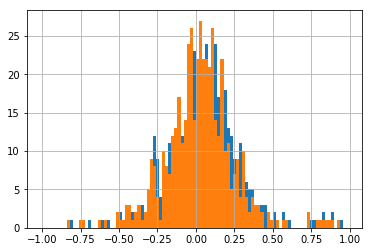

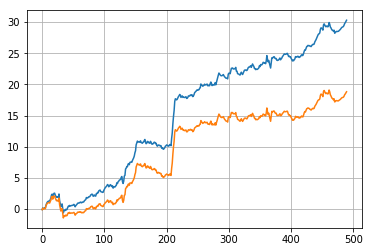

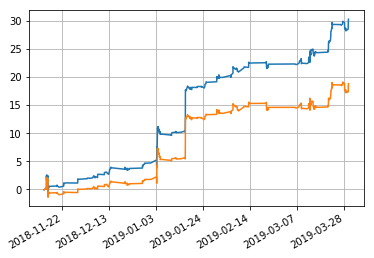

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()
roi1 = pos_under_thr['ROI'].cumsum()
dates1 = list_dates

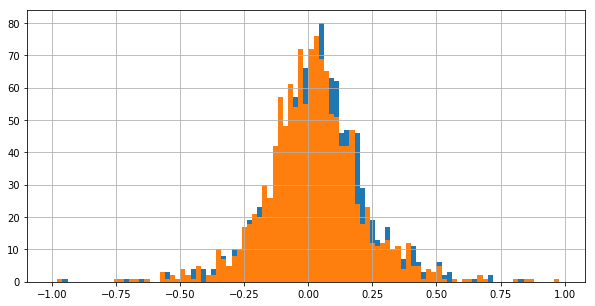

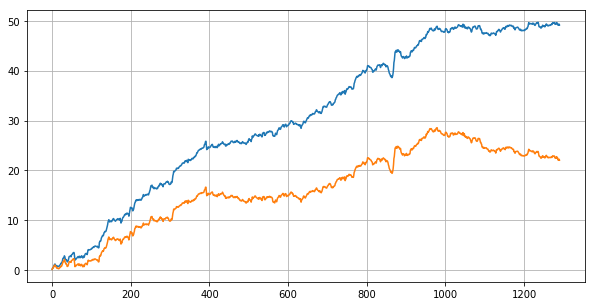

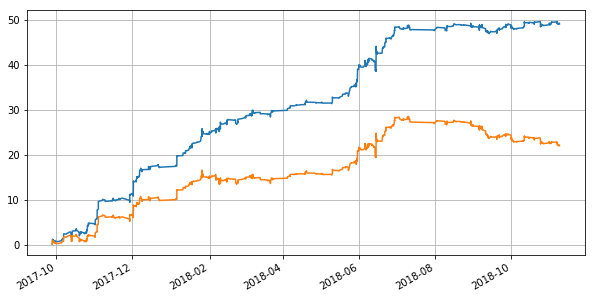

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
#plt.plot_date(dates1, roi1,fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()

In [16]:
ind=pos_under_thr[pos_under_thr['Di']=='2018.06.29'].index[-1]
print(pos_under_thr['Di'].loc[ind])
print('GROI@checkpoint')
print(pos_under_thr['GROI'].loc[:ind].cumsum().iloc[-1])
print('ROI@checkpoint')
print(pos_under_thr['ROI'].loc[:ind].cumsum().iloc[-1])


2018.06.29
GROI@checkpoint
51.412956287554756
ROI@checkpoint
32.49173528904049


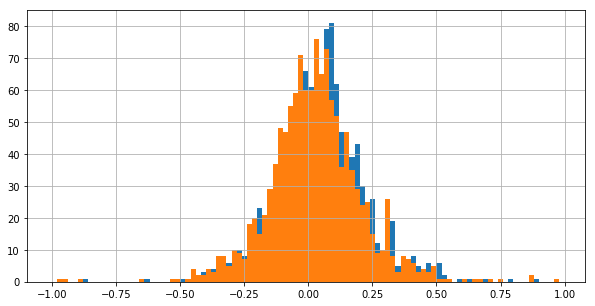

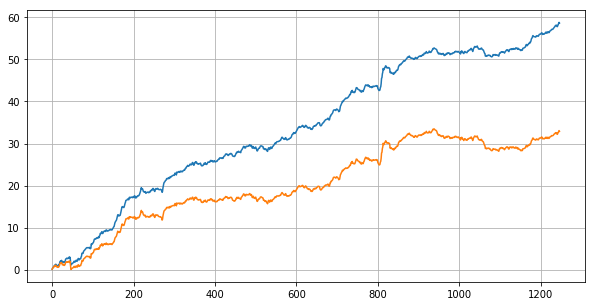

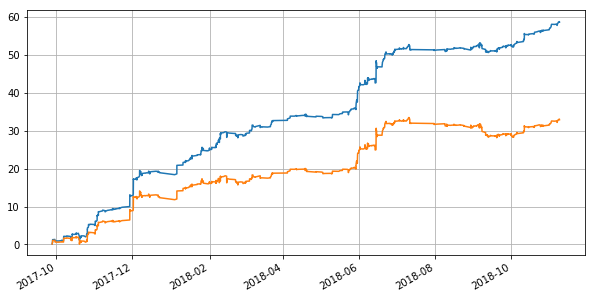

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()

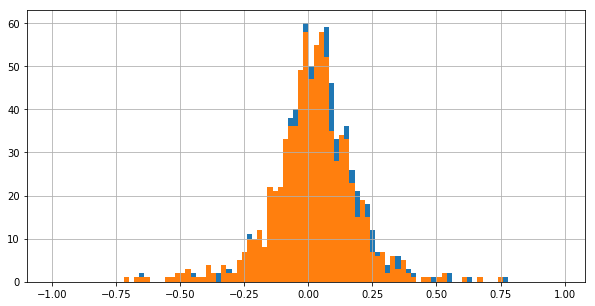

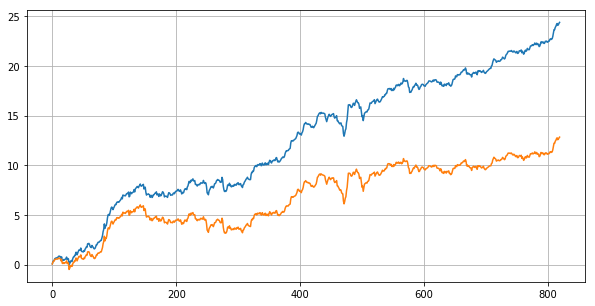

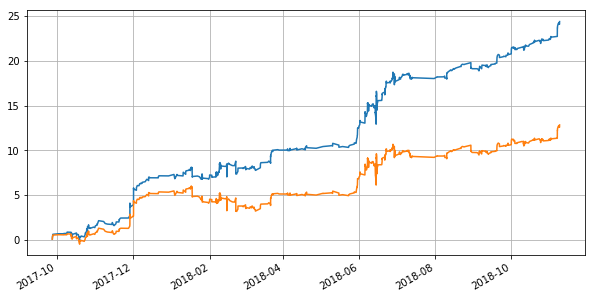

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()

190405174821_RRNN01010-1CMF180410T181109ACk1-k2E12
Test dataset w. RRNN01010CMF181112T190329ACk1k2E12E14, RRNN01011CMF181112T190329ACk1k2E14E14
2


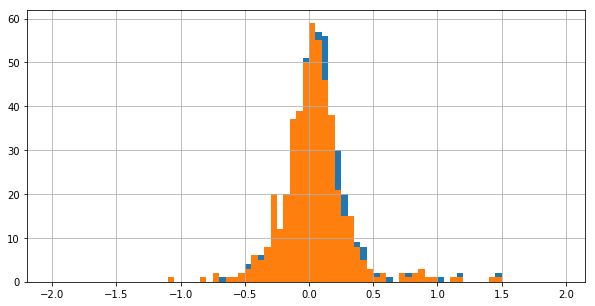

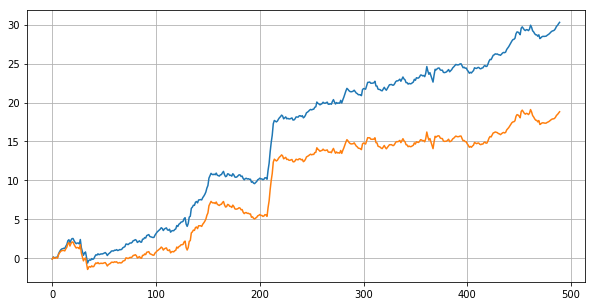

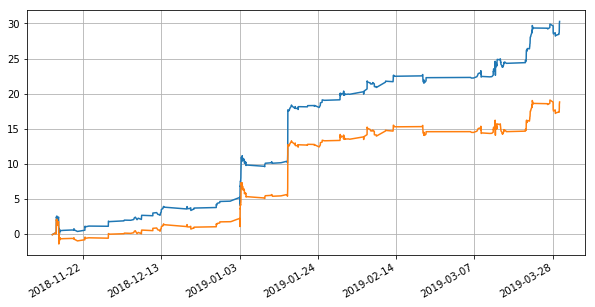

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
print(pos_filename)
print("Test dataset w. RRNN01010CMF181112T190329ACk1k2E12E14, RRNN01011CMF181112T190329ACk1k2E14E14")
mx = int(np.ceil(max(pos_under_thr['GROI'])))
mn = int(np.floor(min(pos_under_thr['ROI'])))
bins = [i/20 for i in range(20*mn,20*mx)]
plt.figure(0)
#bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()
roi1 = pos_under_thr['ROI'].cumsum()
dates1 = list_dates


total mean GROI
0.045146379350986164
mean GROI of selected
0.045146379350986164
mean_spread of selected
0.023469130238007414
Number of pos under 0.1
533
per under pip_limit
100.0
total gross success rate
59.66228893058161
gross success rate
59.66228893058161
total success rate
54.409005628517825
success rate
54.409005628517825
GROI for positions under 0.1
24.063020194075644
ROI for positions under 0.1
11.553973777217692
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
-29.23697980592436
# Assets
20
190409154124_RRNN01010RiCMF181112T190329ACk1k2E12E14E0TI0MC0.7MD0.6_RRNN01011RiCMF181112T190329ACk1k2E14E14E0TI0MC0.65MD0.6


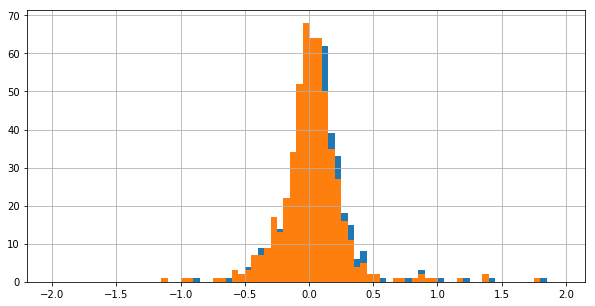

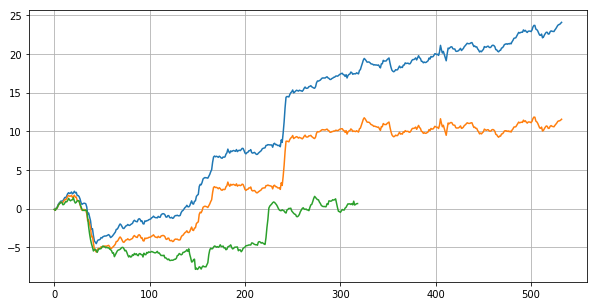

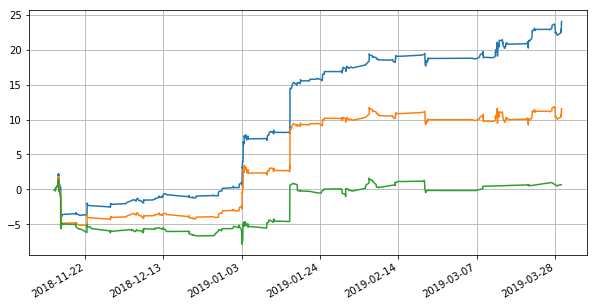

In [99]:

import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

import pandas as pd
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190409154124_RRNN01010RiCMF181112T190329ACk1k2E12E14E0TI0MC0.7MD0.6_RRNN01011RiCMF181112T190329ACk1k2E14E14E0TI0MC0.65MD0.6'
positions = pd.read_csv(pos_dirname+pos_filename+'.csv',sep='\t')#
#print(positions)
pip_limit = 0.1
pos_under_2p = positions['espread']<pip_limit
positions['DTo'] = positions["Do"] + " "+ positions["To"]
pos_under_thr = positions[pos_under_2p]#.sort_values(by=['DTo'])
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(pos_under_thr['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = positions[pos_under_2p]['spread'].mean()
print("total mean GROI")
print(positions['GROI'].mean())
print("mean GROI of selected")
print(positions[pos_under_2p]['GROI'].mean())
print("mean_spread of selected")
print(mean_spread)
print("Number of pos under "+str(pip_limit))
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("total gross success rate")
print(tgsr)
print("gross success rate")
print(gsr)
print("total success rate")
print(tsr)
print("success rate")
print(sr)
print("GROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['GROI'].sum())
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])
print("# Assets")
print(positions['Asset'][pos_under_2p].unique().shape[0])
pos_under_thr.to_csv(pos_dirname+pos_filename+str(100*pip_limit)+'pFilt.csv', index=False, sep='\t')




print(pos_filename)
mx = int(np.ceil(max(pos_under_thr['GROI'])))
mn = int(np.floor(min(pos_under_thr['ROI'])))
bins = [i/20 for i in range(20*mn,20*mx)]
plt.figure(0)
#bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.plot(range(positions_live.shape[0]),positions_live['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.plot_date(list_dates_live, positions_live['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()
roi1 = pos_under_thr['ROI'].cumsum()
dates1 = list_dates


In [20]:
ind=pos_under_thr[pos_under_thr['Di']=='2018.10.26'].index[-1]
print(pos_under_thr['Di'].loc[ind])
print('GROI@checkpoint')
print(pos_under_thr['GROI'].loc[:ind].cumsum().iloc[-1])
print('ROI@checkpoint')
print(pos_under_thr['ROI'].loc[:ind].cumsum().iloc[-1])


2018.10.26
GROI@checkpoint
56.423661374343865
ROI@checkpoint
31.276339802601505


In [87]:
pos_under_thr.sort_values(by=['ROI'],ascending=True).reset_index()

,index,Asset,Di,Ti,Do,To,GROI,ROI,spread,espread,ext,Dir,Bi,Bo,Ai,Ao,strategy,DTo
0,39,GBPCAD,2018.11.15,10:53:53,2018.11.15,12:44:18,-1.104304,-1.136457,0.032153,0.035660,0,1,1.70997,1.69114,1.71058,1.69169,01010Rik1k2K5ACE1214MC7MD.6,2018.11.15 12:44:18
1,35,EURGBP,2018.11.15,10:53:53,2018.11.15,12:18:31,-0.938574,-0.954406,0.015831,0.011416,0,-1,0.87588,0.88418,0.87598,0.88432,01010Rik1k2K5ACE1214MC7MD.6,2018.11.15 12:18:31
2,41,GBPUSD,2018.11.15,10:54:00,2018.11.15,13:08:01,-0.895855,-0.909780,0.013925,0.013925,0,1,1.29244,1.28086,1.29262,1.28104,01010Rik1k2K5ACE1214MC7MD.6,2018.11.15 13:08:01
3,42,GBPCHF,2018.11.15,10:54:07,2018.11.15,13:18:30,-0.691298,-0.733685,0.042387,0.040846,0,1,1.29703,1.28804,1.29756,1.28859,01010Rik1k2K5ACE1214MC7MD.6,2018.11.15 13:18:30
4,352,EURAUD,2019.02.21,02:31:57,2019.02.21,03:58:03,-0.635894,-0.653558,0.017664,0.024124,0,-1,1.57481,1.58489,1.57519,1.58517,01011Rik1k2K5ACE14MC55MD55,2019.02.21 03:58:03
5,406,GBPCAD,2019.03.12,13:04:26,2019.03.12,13:31:37,-0.568460,-0.591814,0.023354,0.027910,0,1,1.75513,1.74523,1.75562,1.74564,01011Rik1k2K5ACE14MC55MD55,2019.03.12 13:31:37
6,353,AUDCAD,2019.02.21,02:34:45,2019.02.21,04:26:31,-0.534686,-0.558942,0.024256,0.028474,0,1,0.94795,0.94292,0.94822,0.94315,01010Rik1k2K5ACE1214MC7MD.6,2019.02.21 04:26:31
7,37,GBPAUD,2018.11.15,10:54:12,2018.11.15,12:40:06,-0.524548,-0.553344,0.028796,0.045736,0,1,1.77024,1.76125,1.77105,1.76176,01010Rik1k2K5ACE1214MC7MD.6,2018.11.15 12:40:06
8,512,GOLD,2019.03.28,15:01:36,2019.03.28,16:43:01,-0.481021,-0.501031,0.020010,0.020780,0,1,1299.05000,1292.81000,1299.32000,1293.07000,01010Rik1k2K5ACE1214MC7MD.6,2019.03.28 16:43:01
9,38,GBPJPY,2018.11.15,11:18:28,2018.11.15,12:40:11,-0.484361,-0.500827,0.016466,0.012349,0,1,145.74100,145.02900,145.75900,145.05300,01010Rik1k2K5ACE1214MC7MD.6,2018.11.15 12:40:11


In [100]:
positions_live.sort_values(by=['ROI'],ascending=True).reset_index()

,index,Asset,Entry Time,Exit Time,Position,Bi,Ai,Bo,Ao,ticks_d,GROI,Spread,ROI,strategy,Profit,E_spread,stoploss,stGROI,stROI
0,148,AUDJPY,2019.01.03 01:23:40,2019.01.03 02:26:31,-2,73.78400,73.81000,74.73700,74.76700,0,-1.274627,0.040125,-1.314751,01011k1k2K5ACE1214MC65MD6,-131.475116,0.044354,0,-0.936612,-0.995008
1,36,GBPCAD,2018.11.15 10:53:53,2018.11.15 12:44:18,2,1.70997,1.71058,1.69114,1.69169,0,-1.104304,0.032153,-1.136457,01010k1k2K5ACE1214MC7MD6,-113.645664,0.031967,0,-1.942798,-2.119564
2,35,EURGBP,2018.11.15 10:53:53,2018.11.15 12:18:31,-1,0.87588,0.87598,0.88418,0.88432,0,-0.938574,0.015831,-0.954406,01010k1k2K5ACE1214MC7MD6,-95.440565,0.019254,0,-0.480783,-0.625225
3,37,GBPUSD,2018.11.15 10:54:00,2018.11.15 13:08:01,2,1.29244,1.29262,1.28086,1.28104,0,-0.895855,0.013925,-0.909780,01010k1k2K5ACE1214MC7MD6,-90.978014,0.011734,0,-1.296481,-1.371270
4,38,GBPCHF,2018.11.15 10:54:07,2018.11.15 13:18:30,2,1.29703,1.29756,1.28804,1.28859,0,-0.691298,0.042387,-0.733685,01010k1k2K5ACE1214MC7MD6,-73.368476,0.039626,0,-0.328744,-0.579439
5,142,USDJPY,2019.01.03 00:34:54,2019.01.03 02:50:10,2,108.20800,108.23600,107.47500,107.48600,0,-0.692930,0.010163,-0.703093,01010k1k2K5ACE1214MC7MD6,-70.309324,0.013959,0,-0.886711,-0.902358
6,296,EURAUD,2019.02.21 02:30:42,2019.02.21 03:55:59,-1,1.57589,1.57632,1.58482,1.58514,0,-0.563357,0.020187,-0.583545,01011k1k2K5ACE1214MC65MD6,-58.354467,0.024039,0,-0.563357,-0.583545
7,297,AUDCAD,2019.02.21 02:34:30,2019.02.21 04:25:49,1,0.94791,0.94815,0.94287,0.94311,0,-0.531561,0.025312,-0.556874,01010k1k2K5ACE1214MC7MD6,-55.687391,0.021144,0,-0.531561,-0.556874
8,39,GBPAUD,2018.11.15 10:54:12,2018.11.15 12:40:06,2,1.77024,1.77105,1.76125,1.76176,0,-0.524548,0.028796,-0.553344,01010k1k2K5ACE1214MC7MD6,-55.334406,0.027853,0,0.153591,-0.038776
9,144,GBPUSD,2019.01.03 01:01:00,2019.01.03 02:47:24,-1,1.24872,1.24922,1.25533,1.25555,0,-0.526463,0.017522,-0.543985,01011k1k2K5ACE1214MC65MD6,-54.398471,0.046217,0,-0.526463,-0.543985
